<a href="https://colab.research.google.com/github/rafarodriguero/ciencias_dados_python/blob/main/projeto_aula_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import quantstats as qs

# Como funciona a lógica do programa?

* Pegar composição do Ibovespa desde 2015. (Definir universo investível)
* Criar a lista de códigos de negociação de todas as empresas que passaram no Ibovespa desde 2015.
* Puxar as cotações dessa lista de códigos de negociação. 
* Tratar os dados de cotação: Lidar com dados faltantes, mudar para a frequência mensal e correção/extração das datas. 
* Calcular retornos mensais e 6 meses (retorno da carteira e indicador momento 6 meses).
* Tratar dados de retorno e preço para um formato mais amigável. 
* Calcular retornos do modelo.
* Puxar dados do Ibovespa.
* Tretar os dados e calcular retorno mensal do Ibovespa.
* Visualizar retornos e estatística mensal do modelo e do Ibovespa.
* Calcular retorno ano a ano.
* Calcular retorno acumulado.
* Visualizar retorno acumulado.

In [ ]:
tickers = pd.read_excel("composicao_ibov.xlsx")

tickers

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,PETR3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,ITUB4,BBDC4,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3,PETR3
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,PETR3,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4,BBDC4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,BEEF3,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4,GOLL4
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BIDI4,EZTC3,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3,CASH3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,JHSF3,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3,POSI3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN,NaN


In [ ]:
#pegando lista de tickers

intervalo_tempo = tickers.columns

lista_tickers = []
for mes in intervalo_tempo:

    tickers_no_ano = tickers[mes]
    tickers_no_ano = tickers_no_ano.dropna()
    tickers_no_ano = tickers_no_ano + ".SA"
    lista_tickers.append(tickers_no_ano)

lista_tickers_finais = pd.concat(lista_tickers)

lista_tickers_finais = lista_tickers_finais.drop_duplicates()

lista_tickers_finais = list(lista_tickers_finais)

lista_tickers_finais

['ABEV3.SA',
 'AMER3.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'FIBR3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'OIBR3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'UGPA3.SA',
 'USIM5.SA',
 'VALE3.SA',
 'VALE5.SA',
 'VIVT3.SA',
 'YDUQ3.SA',
 'WEGE3.SA',
 'ELET6.SA',
 'TAEE11.SA',
 'FLRY3.SA',
 'MGLU3.SA',
 'SAPR11.SA',
 'VVAR11.SA',
 'JPSA3.SA',
 'CVCB3.SA',
 'VIIA3.SA',
 'LOGG3.SA',
 'VBBR3.SA',
 'IRBR3.SA',
 'AZUL4.SA',
 'HAPV3.SA',
 'BPAC1

In [ ]:
#puxando dados de cotação ajustada

dados_cotacoes = pdr.get_data_yahoo(symbols = lista_tickers_finais, start="2015-06-30", end= "2022-09-02" )['Adj Close']

dados_cotacoes

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'HGTX3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'JPSA3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LCAM3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BIDI11.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BIDI4.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441731,19.304613,NaN,2.952750,16.418650,9.641264,9.548721,19.669220,5.087124,63.513847,...,NaN,NaN,NaN,1.771179,4.797364,NaN,NaN,NaN,NaN,NaN
2015-07-01,15.555573,18.623274,NaN,2.932509,16.209011,9.579237,9.518492,19.813763,4.976009,62.158150,...,NaN,NaN,NaN,1.832254,4.911059,NaN,NaN,NaN,NaN,NaN
2015-07-02,15.482392,18.831461,NaN,2.922388,16.161680,9.585187,9.713082,19.912048,4.961515,63.687504,...,NaN,NaN,NaN,1.806079,4.797364,NaN,NaN,NaN,NaN,NaN
2015-07-03,15.571841,18.594885,NaN,2.894555,16.006155,9.612768,9.602176,19.634533,4.860064,63.804401,...,NaN,NaN,NaN,1.779904,4.822321,NaN,NaN,NaN,NaN,NaN
2015-07-06,15.628757,19.683134,NaN,2.919857,16.127872,9.426586,9.413956,19.617186,4.806921,63.931030,...,NaN,NaN,NaN,1.771179,4.838960,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,15.610000,17.510000,14.19,12.340000,42.450001,16.122423,19.490639,28.219999,22.870001,16.370001,...,20.129999,3.79,37.799999,11.570000,48.509998,NaN,NaN,NaN,NaN,NaN
2022-08-30,15.390000,17.040001,14.06,12.190000,42.330002,16.112434,19.430700,28.230000,22.040001,16.190001,...,19.860001,3.62,37.200001,11.690000,48.520000,NaN,NaN,NaN,NaN,NaN
2022-08-31,15.270000,16.340000,15.37,11.850000,41.689999,15.822751,18.941183,28.280001,21.889999,15.850000,...,19.680000,3.62,37.389999,11.880000,48.599998,NaN,NaN,NaN,NaN,NaN


In [ ]:
#resample pra mensal

ultima_linha = dados_cotacoes.iloc[-1:]
dados_cotacoes_mensais = dados_cotacoes.resample("M").last()

dados_cotacoes_mensais

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441731,19.304613,NaN,2.952750,16.418650,9.641264,9.548721,19.669220,5.087124,63.513847,...,NaN,NaN,NaN,1.771179,4.797364,NaN,NaN,NaN,NaN,NaN
2015-07-31,15.832044,17.118650,NaN,2.646594,14.910673,9.536916,9.235831,18.622740,4.748949,70.009499,...,NaN,NaN,NaN,1.745004,4.880556,NaN,NaN,NaN,NaN,NaN
2015-08-31,15.523047,14.762350,NaN,2.765336,12.149344,8.683858,7.752530,17.079344,4.526719,67.720337,...,NaN,NaN,NaN,1.657754,4.461826,NaN,NaN,NaN,NaN,NaN
2015-09-30,15.913110,14.062085,NaN,2.842294,10.528077,8.154860,7.210415,14.764408,3.961483,68.762627,...,NaN,NaN,NaN,1.308753,4.963747,NaN,NaN,NaN,NaN,NaN
2015-10-31,15.642699,13.797121,NaN,2.924382,11.061408,8.098532,7.075218,15.829638,3.985638,58.544189,...,NaN,NaN,NaN,1.308753,4.775179,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,14.190000,20.100000,13.96,12.621819,36.169159,16.612669,20.204075,25.958462,28.580000,15.650000,...,19.84,4.83,48.750000,7.500000,54.849998,NaN,NaN,NaN,NaN,NaN
2022-06-30,13.400000,13.430000,13.62,10.960000,33.215298,14.330008,17.145391,25.070002,25.240000,13.590000,...,17.99,3.86,35.150002,5.550000,44.130001,NaN,NaN,NaN,NaN,NaN
2022-07-31,14.930000,14.000000,14.19,11.090000,35.792519,14.436976,17.393703,27.996124,22.480000,15.960000,...,19.76,3.50,34.020000,6.860000,44.099998,NaN,NaN,NaN,NaN,NaN


In [ ]:
#adicionando uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)

#excluindo uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.drop("2022-09-30", axis = 0)


dados_cotacoes_mensais

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441731,19.304613,NaN,2.952750,16.418650,9.641264,9.548721,19.669220,5.087124,63.513847,...,NaN,NaN,NaN,1.771179,4.797364,NaN,NaN,NaN,NaN,NaN
2015-07-31,15.832044,17.118650,NaN,2.646594,14.910673,9.536916,9.235831,18.622740,4.748949,70.009499,...,NaN,NaN,NaN,1.745004,4.880556,NaN,NaN,NaN,NaN,NaN
2015-08-31,15.523047,14.762350,NaN,2.765336,12.149344,8.683858,7.752530,17.079344,4.526719,67.720337,...,NaN,NaN,NaN,1.657754,4.461826,NaN,NaN,NaN,NaN,NaN
2015-09-30,15.913110,14.062085,NaN,2.842294,10.528077,8.154860,7.210415,14.764408,3.961483,68.762627,...,NaN,NaN,NaN,1.308753,4.963747,NaN,NaN,NaN,NaN,NaN
2015-10-31,15.642699,13.797121,NaN,2.924382,11.061408,8.098532,7.075218,15.829638,3.985638,58.544189,...,NaN,NaN,NaN,1.308753,4.775179,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,14.190000,20.100000,13.96,12.621819,36.169159,16.612669,20.204075,25.958462,28.580000,15.650000,...,19.84,4.83,48.750000,7.500000,54.849998,NaN,NaN,NaN,NaN,NaN
2022-06-30,13.400000,13.430000,13.62,10.960000,33.215298,14.330008,17.145391,25.070002,25.240000,13.590000,...,17.99,3.86,35.150002,5.550000,44.130001,NaN,NaN,NaN,NaN,NaN
2022-07-31,14.930000,14.000000,14.19,11.090000,35.792519,14.436976,17.393703,27.996124,22.480000,15.960000,...,19.76,3.50,34.020000,6.860000,44.099998,NaN,NaN,NaN,NaN,NaN


In [ ]:
#extraindo datas das carteiras

datas_carteiras = list(dados_cotacoes_mensais.index)[6:]
datas_carteiras


[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-

In [ ]:
#preenchendo NAs com zero para calcular retorno
dados_cotacoes_mensais = dados_cotacoes_mensais.fillna(0)

dados_cotacoes_mensais

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441731,19.304613,0.00,2.952750,16.418650,9.641264,9.548721,19.669220,5.087124,63.513847,...,0.00,0.00,0.000000,1.771179,4.797364,0.0,0.0,0.0,0.0,0.0
2015-07-31,15.832044,17.118650,0.00,2.646594,14.910673,9.536916,9.235831,18.622740,4.748949,70.009499,...,0.00,0.00,0.000000,1.745004,4.880556,0.0,0.0,0.0,0.0,0.0
2015-08-31,15.523047,14.762350,0.00,2.765336,12.149344,8.683858,7.752530,17.079344,4.526719,67.720337,...,0.00,0.00,0.000000,1.657754,4.461826,0.0,0.0,0.0,0.0,0.0
2015-09-30,15.913110,14.062085,0.00,2.842294,10.528077,8.154860,7.210415,14.764408,3.961483,68.762627,...,0.00,0.00,0.000000,1.308753,4.963747,0.0,0.0,0.0,0.0,0.0
2015-10-31,15.642699,13.797121,0.00,2.924382,11.061408,8.098532,7.075218,15.829638,3.985638,58.544189,...,0.00,0.00,0.000000,1.308753,4.775179,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,14.190000,20.100000,13.96,12.621819,36.169159,16.612669,20.204075,25.958462,28.580000,15.650000,...,19.84,4.83,48.750000,7.500000,54.849998,0.0,0.0,0.0,0.0,0.0
2022-06-30,13.400000,13.430000,13.62,10.960000,33.215298,14.330008,17.145391,25.070002,25.240000,13.590000,...,17.99,3.86,35.150002,5.550000,44.130001,0.0,0.0,0.0,0.0,0.0
2022-07-31,14.930000,14.000000,14.19,11.090000,35.792519,14.436976,17.393703,27.996124,22.480000,15.960000,...,19.76,3.50,34.020000,6.860000,44.099998,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Exemplo de como é preenchido um DataFrame - Não faz parte do código

import pandas as pd
import numpy as np

vetor = pd.DataFrame(data = {'ITSA3': [1,2,3,4,5]}, index = ['01','02','03','04','05'])
vetor['ITSA4'] = [5,4,3,2,1]
vetor['ITSA5'] = [6,7,8,0,9]
vetor['ITSA6'] = [1,2,3,4,0]

vetor

,ITSA3,ITSA4,ITSA5,ITSA6
01,1,5,6,1
02,2,4,7,2
03,3,3,8,3
04,4,2,0,4
05,5,1,9,0


In [ ]:
#Código para testar os comendos pct_change() e replace (np.inf, -np.inf, -1)
# np.inf: Infinito positivo - quando sai do zero para algum valor
#-np.inf: Infinito Negativo - quando sai do zero para algum valor negativo
#     -1:
vetor = pd.DataFrame(
index = pd.MultiIndex.from_product([['2022-02-28', '2022-03-31']],
                                    names=['Data']),
data={'AURE3.SA':[0, -15.8950424194335]})

vetor = vetor.pct_change()

#vetor = vetor.replace(np.inf, 0)

print(vetor)

            AURE3.SA
Data                
2022-02-28       NaN
2022-03-31      -inf


In [ ]:
#calculando retorno mensal

for i, nome_empresa in enumerate(dados_cotacoes_mensais.columns):

    if i == 0:

      retornos = dados_cotacoes_mensais[nome_empresa].pct_change()

      retornos = retornos.replace([np.inf, -np.inf, -1], 0)

      df_retornos = pd.DataFrame(data = {nome_empresa: retornos}, index = dados_cotacoes_mensais.index)

    else:
    
      df_retornos[nome_empresa] = dados_cotacoes_mensais[nome_empresa].pct_change().replace([np.inf, -np.inf, -1], 0)


df_retornos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.025276,-0.113235,NaN,-0.103685,-0.091845,-0.010823,-0.032768,-0.053204,-0.066477,0.102271,...,NaN,NaN,NaN,-0.014778,0.017341,NaN,NaN,NaN,NaN,NaN
2015-08-31,-0.019517,-0.137645,NaN,0.044866,-0.185191,-0.089448,-0.160603,-0.082877,-0.046796,-0.032698,...,NaN,NaN,NaN,-0.050000,-0.085796,NaN,NaN,NaN,NaN,NaN
2015-09-30,0.025128,-0.047436,NaN,0.027830,-0.133445,-0.060917,-0.069927,-0.135540,-0.124867,0.015391,...,NaN,NaN,NaN,-0.210526,0.112492,NaN,NaN,NaN,NaN,NaN
2015-10-31,-0.016993,-0.018842,NaN,0.028881,0.050658,-0.006907,-0.018750,0.072148,0.006097,-0.148605,...,NaN,NaN,NaN,0.000000,-0.037989,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.022727,-0.162500,-0.042060,-0.039850,0.106807,0.133449,0.141361,0.057019,0.031272,0.152430,...,-0.039164,0.018867,0.054510,0.051965,0.086486,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.055673,-0.331841,-0.024355,-0.131662,-0.081668,-0.137405,-0.151389,-0.034226,-0.116865,-0.131629,...,-0.093246,-0.200828,-0.278974,-0.260000,-0.195442,NaN,NaN,NaN,NaN,NaN
2022-07-31,0.114179,0.042442,0.041850,0.011861,0.077591,0.007465,0.014483,0.116718,-0.109350,0.174393,...,0.098388,-0.093264,-0.032148,0.236036,-0.000680,NaN,NaN,NaN,NaN,NaN


In [ ]:
#calculando retorno 6 meses

for i, nome_empresa in enumerate(dados_cotacoes_mensais.columns):

    if i == 0:

      retornos = dados_cotacoes_mensais[nome_empresa].pct_change(periods = 6)

      retornos = retornos.replace([np.inf, -np.inf, -1], 0)

      df_retornos_6m = pd.DataFrame(data = {nome_empresa: retornos}, index = dados_cotacoes_mensais.index)

    else:
    
      df_retornos_6m[nome_empresa] = dados_cotacoes_mensais[nome_empresa].pct_change(periods = 6).replace([np.inf, -np.inf, -1], 0)


df_retornos_6m.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.044826,-0.253431,NaN,-0.019676,-0.362492,-0.235068,-0.289905,-0.263887,-0.501427,-0.150329,...,NaN,NaN,NaN,-0.162562,-0.049133,NaN,NaN,NaN,NaN,NaN
2016-01-31,-0.026099,-0.266998,NaN,0.030454,-0.340404,-0.260394,-0.308186,-0.260869,-0.644662,-0.320789,...,NaN,NaN,NaN,-0.340000,-0.070455,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.054421,-0.259615,NaN,0.116932,-0.208609,-0.034315,-0.029976,-0.130478,-0.547496,-0.251678,...,NaN,NaN,NaN,-0.273684,0.143567,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_retornos = df_retornos.loc["2015-12-31": ]
df_retornos_6m = df_retornos_6m.loc["2015-12-31": ]

df_retornos_6m

,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.253431,NaN,-0.019676,-0.362492,-0.235068,-0.289905,-0.263887,-0.501427,-0.150329,...,NaN,NaN,NaN,-0.162562,-0.049133,NaN,NaN,NaN,NaN,NaN
2016-01-31,-0.026099,-0.266998,NaN,0.030454,-0.340404,-0.260394,-0.308186,-0.260869,-0.644662,-0.320789,...,NaN,NaN,NaN,-0.340000,-0.070455,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.054421,-0.259615,NaN,0.116932,-0.208609,-0.034315,-0.029976,-0.130478,-0.547496,-0.251678,...,NaN,NaN,NaN,-0.273684,0.143567,NaN,NaN,NaN,NaN,NaN
2016-03-31,-0.016942,-0.044415,NaN,0.435515,0.347493,0.330233,0.323655,0.239387,-0.210925,-0.262721,...,NaN,NaN,NaN,-0.013333,-0.117318,NaN,NaN,NaN,NaN,NaN
2016-04-30,0.031436,-0.060357,NaN,0.561556,0.434324,0.376729,0.421211,0.166876,0.080156,-0.169646,...,NaN,NaN,NaN,-0.026667,-0.098722,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.081956,-0.323756,0.000000,0.183711,0.196423,0.113366,0.154198,0.338458,-0.233300,-0.207595,...,0.069464,-0.100750,0.765025,-0.103074,0.647592,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.130999,-0.566189,0.000000,0.012196,0.206000,-0.004612,0.001755,0.300746,0.067465,-0.396536,...,0.002047,-0.371796,0.047690,-0.442227,0.129822,NaN,NaN,NaN,NaN,NaN
2022-07-31,-0.002672,-0.547151,0.000000,-0.223076,0.147972,-0.137303,-0.144579,0.302539,-0.114464,-0.285266,...,0.011411,-0.449970,-0.110356,-0.197141,0.005206,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_cotacoes_mensais = dados_cotacoes_mensais.reset_index()
df_retornos = df_retornos.reset_index()
df_retornos_6m = df_retornos_6m.reset_index()


dados_cotacoes_mensais = pd.melt(dados_cotacoes_mensais, id_vars= "Date", var_name= "cod", value_name= "cotacao")
df_retornos = pd.melt(df_retornos, id_vars= "Date", var_name= "cod", value_name= "retorno_1m")
df_retornos_6m = pd.melt(df_retornos_6m, id_vars= "Date", var_name= "cod", value_name= "retorno_6m")



In [ ]:
dados_cotacoes_mensais = dados_cotacoes_mensais.dropna()
df_retornos = df_retornos.dropna()
df_retornos_6m = df_retornos_6m.dropna()


In [ ]:
lista_retornos = []

#Logica: Pega os codigos de negociação -> Acha os retornos 6M -> Filtra os 10 maiores -> Calcula o retorno de 1 mês dessa carteira -> Repete

for indice, mes in enumerate(datas_carteiras):

    #pegando empresas do ibov mes a mes

    empresas_ibov = tickers[intervalo_tempo[indice]] #Pega todas os códigos de empresa

    empresas_ibov = list(empresas_ibov.dropna().values) #exclui as linhas NaN

    empresas_ibov = [empresa + ".SA" for empresa in empresas_ibov] #quero x a cada y #acrescenta a string .SA, pois na pesquida dos dataframe retorno e retorno_6m o nome da empresa está como IRBR3.SA

    #pegando retornos 6 meses pra criar o ranking

    retornos_empresas_ibov_esse_ano = df_retornos_6m[(df_retornos_6m["cod"].isin(empresas_ibov)) & (df_retornos_6m['Date'] == mes)] #retorna os dados da data pesquisada

    #pegando os 10 maiores retornos

    dez_maiores_retornos = retornos_empresas_ibov_esse_ano.sort_values(by = "retorno_6m", ascending = False).head(10) #seleciona os dez maiores do retorno_6m 

    tickers_dez_maiores_retornos = dez_maiores_retornos["cod"].to_list() #pega somente os códigos de empresa dos 10 maiores retornos
    
    print(datas_carteiras[indice] , ' ', tickers_dez_maiores_retornos)

    #calculando retorno da carteira 

    if indice != (len(datas_carteiras) - 1): #A carteira de sexta (Último dia de pesqisa 12/08/2022) não tem retorno

      retornos_12m_seguintes = df_retornos[(df_retornos["cod"].isin(tickers_dez_maiores_retornos)) & (df_retornos['Date'] == datas_carteiras[indice + 1])] #No retorno mes a mes pega os percentuais de retorno do mês seginte ao pesquisado

      retorno_mes = np.mean(retornos_12m_seguintes['retorno_1m']) #pega os percentuais do retorno_mes do mês seguinte

      df_retorno_modelo = pd.DataFrame(data = {"retorno": retorno_mes}, index = [(mes + relativedelta(months=1))]) #monta dataframe com os dados do retorno_mes que são dados do mês seguinte

      lista_retornos.append(df_retorno_modelo) #append no dataframe


retornos_modelo = pd.concat(lista_retornos) #concatena o dataframe para montar os dados retornados

retornos_modelo

2015-12-31 00:00:00   ['BRKM5.SA', 'FIBR3.SA', 'EMBR3.SA', 'KLBN11.SA', 'SBSP3.SA', 'MRFG3.SA', 'MRVE3.SA', 'ENBR3.SA', 'CSAN3.SA', 'SANB11.SA']
2016-01-31 00:00:00   ['BRKM5.SA', 'CSAN3.SA', 'SBSP3.SA', 'EMBR3.SA', 'MRVE3.SA', 'MRFG3.SA', 'HYPE3.SA', 'EQTL3.SA', 'FIBR3.SA', 'B3SA3.SA']
2016-02-29 00:00:00   ['BRKM5.SA', 'MRVE3.SA', 'CSAN3.SA', 'HYPE3.SA', 'CSNA3.SA', 'SBSP3.SA', 'EMBR3.SA', 'BRML3.SA', 'RADL3.SA', 'SANB11.SA']
2016-03-31 00:00:00   ['MRVE3.SA', 'HYPE3.SA', 'CSNA3.SA', 'CSAN3.SA', 'SBSP3.SA', 'COGN3.SA', 'B3SA3.SA', 'SANB11.SA', 'BRML3.SA', 'BRKM5.SA']
2016-04-30 00:00:00   ['CSNA3.SA', 'HYPE3.SA', 'MRVE3.SA', 'SBSP3.SA', 'B3SA3.SA', 'BRML3.SA', 'GGBR4.SA', 'BBAS3.SA', 'MULT3.SA', 'BBDC4.SA']
2016-05-31 00:00:00   ['ECOR3.SA', 'RADL3.SA', 'B3SA3.SA', 'CSAN3.SA', 'SBSP3.SA', 'EQTL3.SA', 'CYRE3.SA', 'BRAP4.SA', 'MULT3.SA', 'HYPE3.SA']
2016-06-30 00:00:00   ['CSNA3.SA', 'RADL3.SA', 'BRAP4.SA', 'B3SA3.SA', 'ECOR3.SA', 'MULT3.SA', 'SBSP3.SA', 'BRML3.SA', 'BBDC3.SA', 'BBDC4.

,retorno
2016-01-31,-0.043231
2016-02-29,0.076903
2016-03-29,0.091320
2016-04-30,0.165053
2016-05-30,-0.164843
...,...
2022-05-30,0.052199
2022-06-30,-0.109157
2022-07-30,0.098388
2022-08-31,0.113502


In [ ]:
#pegando dados do ibov

ibovespa = pdr.get_data_yahoo(symbols = '^BVSP', start="2015-12-30", end= "2022-09-02" )['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-05-31    0.032213
2022-06-30   -0.115033
2022-07-31    0.046914
2022-08-31    0.061629
2022-09-30    0.012244
Freq: M, Name: Adj Close, Length: 81, dtype: float64

In [ ]:
retornos_modelo['ibovespa'] = retornos_ibovespa.values

retornos_modelo.style.format({
    'retorno': '{:,.2%}'.format,
    'ibovespa': '{:,.2%}'.format
})

,retorno,ibovespa
2016-01-31 00:00:00,-4.32%,-6.79%
2016-02-29 00:00:00,7.69%,5.91%
2016-03-29 00:00:00,9.13%,16.97%
2016-04-30 00:00:00,16.51%,7.70%
2016-05-30 00:00:00,-16.48%,-10.09%
2016-06-30 00:00:00,7.75%,6.30%
2016-07-30 00:00:00,11.46%,11.22%
2016-08-31 00:00:00,6.64%,1.03%
2016-09-30 00:00:00,-2.72%,0.80%
2016-10-30 00:00:00,20.92%,11.24%


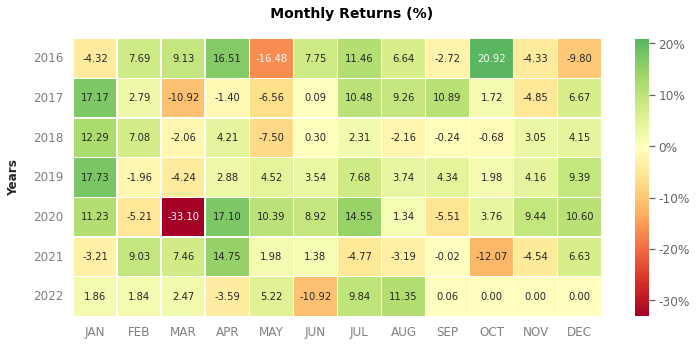

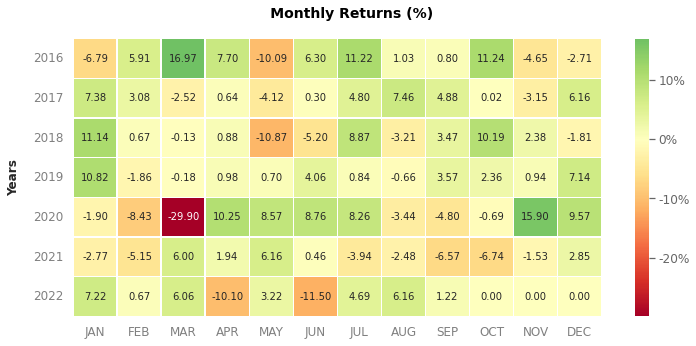

In [ ]:
qs.extend_pandas()

retornos_modelo['retorno'].plot_monthly_heatmap()

retornos_modelo['ibovespa'].plot_monthly_heatmap()

#olha pra mim agora: se você chegar em alguma empresa do mercado financeiro, ou tem vontade de trabalhar como analista, existe alguma chance de você chegar 
#na entrevista de emprego com esse conhecimento em Python e você não passar? Você sabendo programar um modelo desse, com uma boa visualização de dados, você
#passa pra qualquer lugar. 

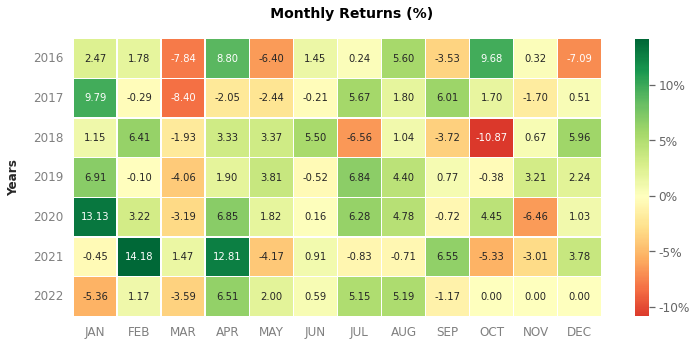

In [ ]:
serie_long_short = retornos_modelo['retorno'] - retornos_modelo['ibovespa']

serie_long_short.plot_monthly_heatmap()

In [ ]:
#meses batendo o mercado 

retornos_modelo_bateu_mercado = retornos_modelo.copy()

retornos_modelo_bateu_mercado['bateu_mercado'] = retornos_modelo['retorno'] > retornos_modelo['ibovespa']

print(retornos_modelo_bateu_mercado)

proporcao_meses_bateu_o_mercado = sum(retornos_modelo_bateu_mercado['bateu_mercado']/len(retornos_modelo_bateu_mercado['bateu_mercado']))
print(proporcao_meses_bateu_o_mercado)

             retorno  ibovespa  bateu_mercado
2016-01-31 -0.043231 -0.067912           True
2016-02-29  0.076903  0.059100           True
2016-03-29  0.091320  0.169673          False
2016-04-30  0.165053  0.077035           True
2016-05-30 -0.164843 -0.100889          False
...              ...       ...            ...
2022-05-30  0.052199  0.032213           True
2022-06-30 -0.109157 -0.115033           True
2022-07-30  0.098388  0.046914           True
2022-08-31  0.113502  0.061629           True
2022-09-30  0.000572  0.012244          False

[81 rows x 3 columns]
0.6296296296296302


In [ ]:
#retorno anual

retorno_anual = retornos_modelo.copy()
retorno_anual['retorno'] = retorno_anual['retorno'] + 1 
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1

retorno_anual["ano"] = retorno_anual.index.year

retorno_anual["retorno_acumulado_ano"] = retorno_anual.groupby('ano')['retorno'].cumprod() - 1
retorno_anual["retorno_acumulado_ibov"] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1

retorno_anual = retorno_anual.reset_index()

retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual.style.format({
    'retorno_acumulado_ano': '{:,.2%}'.format,
    'retorno_acumulado_ibov': '{:,.2%}'.format})


,ano,retorno_acumulado_ano,retorno_acumulado_ibov
11,2016,42.23%,38.93%
23,2017,36.72%,26.86%
35,2018,21.20%,15.03%
47,2019,66.66%,31.95%
59,2020,36.82%,2.88%
71,2021,10.99%,-12.14%
80,2022,17.55%,5.76%


In [ ]:
cumulative_ret_modelo = (retornos_modelo.retorno + 1).cumprod() - 1

cumulative_ret_ibov = (retornos_modelo.ibovespa + 1).cumprod() - 1

df_acumulado = pd.DataFrame(data = {"retorno_acum_modelo": cumulative_ret_modelo, "retorno_acum_ibov" : cumulative_ret_ibov }, index = cumulative_ret_ibov.index)

df_acumulado = df_acumulado.resample("Y").last()

df_acumulado = df_acumulado[['retorno_acum_modelo', 'retorno_acum_ibov']]

df_acumulado.style.format({
    'retorno_acum_modelo': '{:,.2%}'.format,
    'retorno_acum_ibov': '{:,.2%}'.format
})

,retorno_acum_modelo,retorno_acum_ibov
2016-12-31 00:00:00,42.23%,38.93%
2017-12-31 00:00:00,94.47%,76.24%
2018-12-31 00:00:00,135.68%,102.74%
2019-12-31 00:00:00,292.78%,167.51%
2020-12-31 00:00:00,437.40%,175.22%
2021-12-31 00:00:00,496.47%,141.80%
2022-12-31 00:00:00,601.13%,155.74%


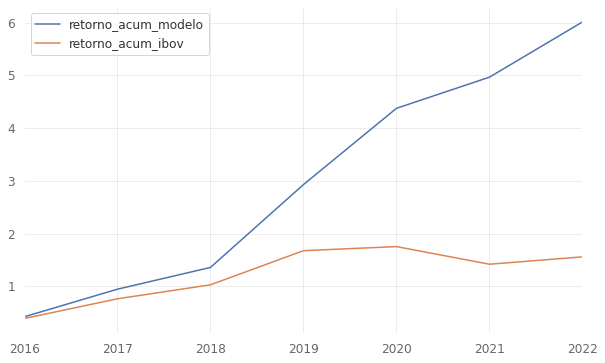

In [ ]:
df_acumulado.plot()